# Tello Vision Telemetry Lab

## Control Inspector

### Description: inspect person tracking control loop data telemetry 

See data explanation at [the end of the notebook](#data-explanation).

### Index:
* [Telemetry Analysis Setup](#analysis-setup)
* [Control loop time analysis](#time-analysis)
* [Yaw Cpntrpl: Horizontal angle tracking and Uyaw command](#yaw-control)
* [Range Control: Distance tracking analysis and Uz command](#distance-control)
* [Heigth Control: Time of flight  heigth data and Uy command](#heigth-control)
* [Lateral Control: Lateral Distance tracking and Ux command](#lateral-control)
* [Flight Status: Battery](#battery)
* [Flight Status: Temperature](#temperature)
* [Flight Status: IMU pitch, roll, yaw](#imu)
* [Telemetry Data Explanation](#data-explanation)
* [Telemetry Data Filtering](#data-filtering)


### Telemetry Analysis Setup <a class="anchor" id="analysis-setup"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [28]:
#Read data
df = pd.read_csv('data/tv_telemetry_210324_115725_demo_spotlight.txt',decimal=".")
df.head(2)

,timestamp,trackMode,telSeqId,personCount,personConfidence,faceXPx,faceYPx,faceRadiusPx,angle_err,estimatedDistance,...,Uy,pitch,roll,yaw,vx,vy,vz,tof,batt,temp
0,6473,0,0,0,0,0,0,0,0,0,...,0,-1,-1,0,0,0,0,10,86,60
1,6576,0,0,0,0,0,0,0,0,0,...,0,-1,-1,0,0,0,0,10,86,60


In [29]:
#Extract data columns
timestamp=df["timestamp"]
trackMode=df["trackMode"]
telSeqId=df["telSeqId"]
personCount=df["personCount"]
personConfidence=df["personConfidence"]
faceXPx=df["faceXPx"]
faceYPx=df["faceYPx"]
faceRadius=df["faceRadiusPx"]
theta=df["angle_err"]
estimatedDistance=df["estimatedDistance"]
xPos=df["estimatedXPos"]
yPos=df["estimatedYPos"]
Uyaw=df["Uyaw"]
Ux=df["Ux"]
Uy=df["Uy"]
Uz=df["Uz"]
pitch=df["pitch"]
roll=df["roll"]
yaw=df["yaw"]
vx=df["vx"]
vy=df["vy"]
vz=df["vz"]
tof=df["tof"]
batt=df["batt"]
temp=df["temp"]

#Save fig dpi definition
dpiSelected=72

### Control Loop time analysis <a class="anchor" id="time-analysis"></a>

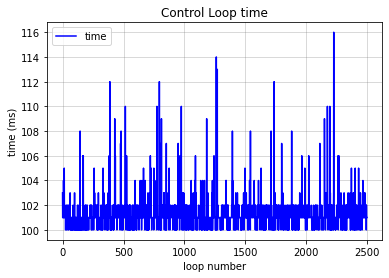

In [30]:
#Control loop time analysis
deltaTime=np.diff(timestamp)
plt.plot(deltaTime,'b')
plt.ylabel('time (ms)')
plt.xlabel('loop number')
plt.title('Control Loop time')
plt.legend(['time'],loc='upper left')
plt.grid(b=True, which='major', color='#666666', linestyle='-',alpha=0.3)
plt.grid(b=True, which='minor', color='#666666', linestyle='-',alpha=0.3)
plt.savefig("out/jpg/control/loop-time.jpg",dpi=dpiSelected)
plt.show()

In [31]:
df_describe = pd.DataFrame(deltaTime)
df_describe.describe()

,0
count,2497.000000
mean,101.237485
std,1.185207
min,100.000000
25%,101.000000
50%,101.000000
75%,101.000000
max,116.000000


### Yaw Control: Horizontal angle tracking and Uyaw command <a class="anchor" id="yaw-control"></a>

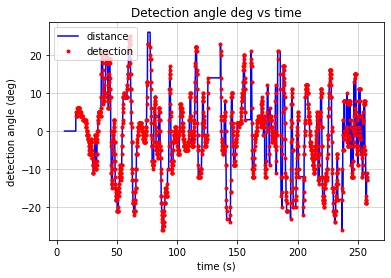

In [32]:
plt.plot(timestamp/1000,theta,'b')
plt.plot(timestamp[personCount>0]/1000,theta[personCount>0],'r.')
plt.xlabel('time (s)')
plt.ylabel('detection angle (deg)')
plt.title('Detection angle deg vs time')
plt.legend(['distance','detection'],loc='upper left')
plt.grid(b=True, which='major', color='#666666', linestyle='-',alpha=0.3)
plt.grid(b=True, which='minor', color='#666666', linestyle='-',alpha=0.3)
plt.savefig("out/jpg/control/angle-tracking.jpg",dpi=dpiSelected)
plt.show()

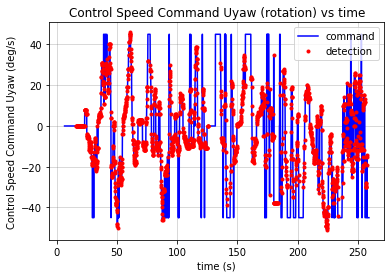

In [33]:
plt.plot(timestamp/1000,Uyaw,'b')
plt.plot(timestamp[personCount>0]/1000,Uyaw[personCount>0],'r.')
plt.xlabel('time (s)')
plt.ylabel('Control Speed Command Uyaw (deg/s)')
plt.title('Control Speed Command Uyaw (rotation) vs time')
plt.legend(['command','detection'],loc='upper right')
plt.grid(b=True, which='major', color='#666666', linestyle='-',alpha=0.3)
plt.grid(b=True, which='minor', color='#666666', linestyle='-',alpha=0.3)
plt.savefig("out/jpg/control/Uyaw.jpg",dpi=dpiSelected)
plt.show()

### Range Control: Distance tracking analysis and Uz command <a class="anchor" id="analysis-setup"></a>

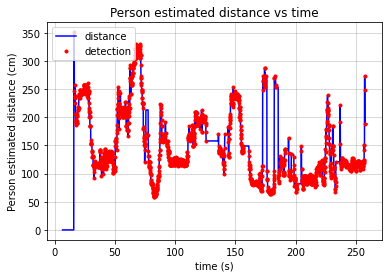

In [34]:
plt.plot(timestamp/1000,estimatedDistance,'b')
plt.plot(timestamp[personCount>0]/1000,estimatedDistance[personCount>0],'r.')
plt.xlabel('time (s)')
plt.ylabel('Person estimated distance (cm)')
plt.title('Person estimated distance vs time')
plt.legend(['distance','detection'],loc='upper left')
plt.grid(b=True, which='major', color='#666666', linestyle='-',alpha=0.3)
plt.grid(b=True, which='minor', color='#666666', linestyle='-',alpha=0.3)
plt.savefig("out/jpg/control/estimatedDistance.jpg",dpi=dpiSelected)
plt.show()

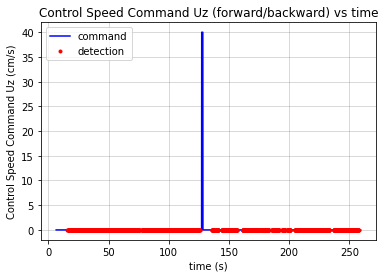

In [35]:
plt.plot(timestamp/1000,Uz,'b')
plt.plot(timestamp[personCount>0]/1000,Uz[personCount>0],'r.')
plt.xlabel('time (s)')
plt.ylabel('Control Speed Command Uz (cm/s)')
plt.title('Control Speed Command Uz (forward/backward) vs time')
plt.legend(['command','detection'],loc='upper left')
plt.grid(b=True, which='major', color='#666666', linestyle='-',alpha=0.3)
plt.grid(b=True, which='minor', color='#666666', linestyle='-',alpha=0.3)
plt.savefig("out/jpg/control/Uz.jpg",dpi=dpiSelected)
plt.show()

### Heigth Control: Time of flight  heigth data and Uy command <a class="anchor" id="heigth-control"></a>

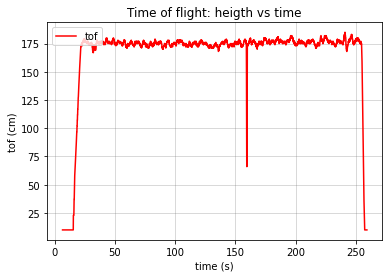

In [36]:
%matplotlib inline
plt.plot(timestamp/1000,tof,'r')
plt.xlabel('time (s)')
plt.ylabel('tof (cm)')
plt.title('Time of flight: heigth vs time')
plt.legend(['tof'],loc='upper left')
plt.grid(b=True, which='major', color='#666666', linestyle='-',alpha=0.3)
plt.grid(b=True, which='minor', color='#666666', linestyle='-',alpha=0.3)
plt.savefig("out/jpg/control/tof.jpg",dpi=dpiSelected)
plt.show()

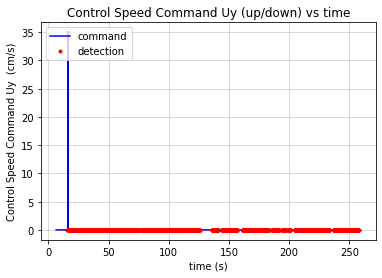

In [37]:
plt.plot(timestamp/1000,Uy,'b')
plt.plot(timestamp[personCount>0]/1000,Uy[personCount>0],'r.')
plt.xlabel('time (s)')
plt.ylabel('Control Speed Command Uy  (cm/s)')
plt.title('Control Speed Command Uy (up/down) vs time')
plt.legend(['command','detection'],loc='upper left')
plt.grid(b=True, which='major', color='#666666', linestyle='-',alpha=0.3)
plt.grid(b=True, which='minor', color='#666666', linestyle='-',alpha=0.3)
plt.savefig("out/jpg/control/Uy.jpg",dpi=dpiSelected)
plt.show()

In [13]:
print(Uy==35)

0      False
1      False
2      False
3      False
4      False
       ...  
638    False
639    False
640    False
641    False
642    False
Name: Ux, Length: 643, dtype: bool


### Lateral Control: Lateral Distance tracking and Ux command <a class="anchor" id="lateral-control"></a>

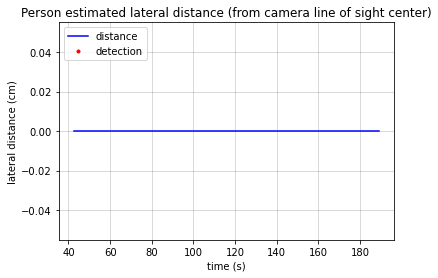

In [14]:
plt.plot(timestamp/1000,xPos,'b')
plt.plot(timestamp[personCount>0]/1000,xPos[personCount>0],'r.')
plt.xlabel('time (s)')
plt.ylabel('lateral distance (cm)')
plt.title('Person estimated lateral distance (from camera line of sight center)')
plt.legend(['distance','detection'],loc='upper left')
plt.grid(b=True, which='major', color='#666666', linestyle='-',alpha=0.3)
plt.grid(b=True, which='minor', color='#666666', linestyle='-',alpha=0.3)
plt.savefig("out/jpg/control/estimatedLateralDistance.jpg",dpi=dpiSelected)
plt.show()

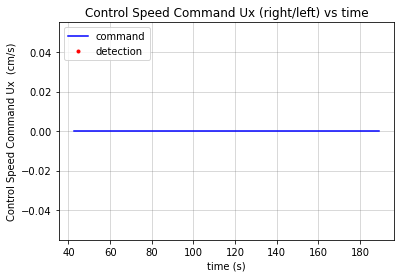

In [15]:
plt.plot(timestamp/1000,Ux,'b')
plt.plot(timestamp[personCount>0]/1000,Ux[personCount>0],'r.')
plt.xlabel('time (s)')
plt.ylabel('Control Speed Command Ux  (cm/s)')
plt.title('Control Speed Command Ux (right/left) vs time')
plt.legend(['command','detection'],loc='upper left')
plt.grid(b=True, which='major', color='#666666', linestyle='-',alpha=0.3)
plt.grid(b=True, which='minor', color='#666666', linestyle='-',alpha=0.3)
plt.savefig("out/jpg/control/Ux.jpg",dpi=dpiSelected)
plt.show()

### Flight Status: Battery <a class="anchor" id="battery"></a>

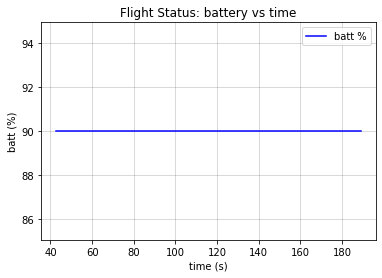

In [16]:
plt.plot(timestamp/1000,batt,'b')
plt.ylabel('batt (%)')
plt.xlabel('time (s)')
plt.title('Flight Status: battery vs time')
plt.legend(['batt %'],loc='upper right')
plt.grid(b=True, which='major', color='#666666', linestyle='-',alpha=0.3)
plt.grid(b=True, which='minor', color='#666666', linestyle='-',alpha=0.3)
plt.savefig("out/jpg/control/battery.jpg",dpi=dpiSelected)
plt.show()

### Flight Status: Temperature <a class="anchor" id="temperature"></a>

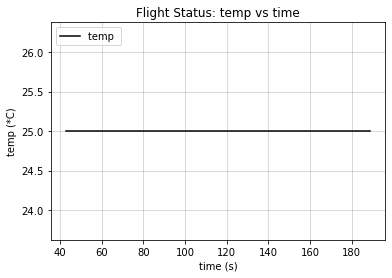

In [17]:
plt.plot(timestamp/1000,temp,'k')
plt.ylabel('temp (*C)')
plt.xlabel('time (s)')
plt.title('Flight Status: temp vs time')
plt.legend(['temp '],loc='upper left')
plt.grid(b=True, which='major', color='#666666', linestyle='-',alpha=0.3)
plt.grid(b=True, which='minor', color='#666666', linestyle='-',alpha=0.3)
plt.savefig("out/jpg/control/temp.jpg",dpi=dpiSelected)
plt.show()

### Flight Status: IMU pitch, roll, yaw <a class="anchor" id="imu"></a>

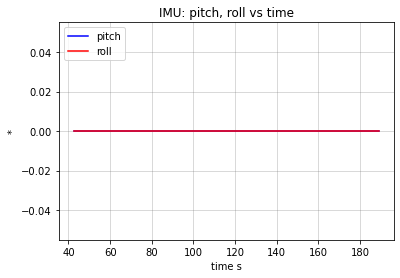

In [18]:
plt.plot(timestamp/1000,pitch,'b',timestamp/1000,roll,'r')
plt.ylabel('*')
plt.xlabel('time s')
plt.title('IMU: pitch, roll vs time')
plt.legend(['pitch','roll'],loc='upper left')
plt.grid(b=True, which='major', color='#666666', linestyle='-',alpha=0.3)
plt.grid(b=True, which='minor', color='#666666', linestyle='-',alpha=0.3)
plt.show()

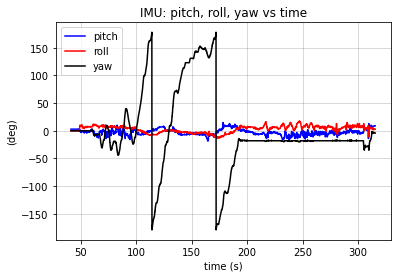

In [33]:
plt.plot(timestamp/1000,pitch,'b',timestamp/1000,roll,'r',timestamp/1000,yaw,'k')
plt.ylabel('(deg)')
plt.xlabel('time (s)')
plt.title('IMU: pitch, roll, yaw vs time')
plt.legend(['pitch','roll','yaw'],loc='upper left')
plt.grid(b=True, which='major', color='#666666', linestyle='-',alpha=0.3)
plt.grid(b=True, which='minor', color='#666666', linestyle='-',alpha=0.3)
plt.savefig("out/jpg/control/yaw-pitch-roll.jpg",dpi=dpiSelected)
plt.show()

## Telemetry Data Explanation <a class="anchor" id="data-explanation"></a>

### timestamp 
Data timestamp (milliseconds).

### trackMode
Tracking Mode coded as follows:

0 -> None, 
1 -> Spotlight,
2 -> Follow,
3 -> Orbit, 
4 -> Profile, 
5 -> Party,
6 -> Forward with person avoidance.

### telSeqId
An incremental number used to manually mark flight phases. Use the Tello Vision 1D app button "Tel ID ++" to mark sequences of interest.

### personCount
Detected person count.

### personConfidence
Detection confidence for the foreground person (%).

### faceXPx, faceYPx, faceRadiusPx
Detection center and apparent face radius for the foreground person (pixels).

### angle_err
Horizontal angle error between the detected face and the center of the image (degrees)

### estimatedDistance
3D Distance between the drone and the detected face (cm).

### estimatedXPos, estimatedYPos, estimatedZPos
estimatedDistance decomposed in the (X,Y,Z) drone frame reference (cm).

X is in the drone right direction, Y is in the drone down direction, Z is in the drone forward direction.

### Uyaw, Uz, Ux, Uy
Speed commands sent to the drone (approximated deg/s and cm/s)

### pitch, roll, yaw
Eulerian angles from the IMU (degrees).

### vx, vy, vz
Velocities from the IMU (decimeter/s).

X is drone's initial forward direction, Y is drone's initial right direction, Z is drone's down direction.

### tof
Drone height from the Time Of Flight sensor (cm).

### batt
Drone battery level (%).

### temp
Drone temperature (°C).

## Telemetry Data Filtering <a class="anchor" id="data-filtering"></a>
Displaying many minutes of telemetry data all in the same plot can be difficult to interpret.
The key is to filter and select data to make the analysis simpler.
It is possible to leverage Python powerful Pandas Data Analysis Library and Tello Vision Telemetry Lab data columns definition.
For example, the trackMode column classifies data by the flight tracking mode active in each moment.
Autonomous tracking modes are coded as follows:
0 -> None, 
1 -> Spotlight,
2 -> Follow,
3 -> Orbit, 
4 -> Profile, 
5 -> Party,
6 -> Forward with person avoidance.

So the following lines  of code:

*tofFollow=(tof[trackMode==2])*

*tofOrbit=(tof[trackMode==3])*

select only Time of Flight data of the Follow mode and the Orbit mode giving the possibility to plot them in two separate figures.
